# 🔍 Feature Importance Visualization (SHAP-Compatible)
This notebook trains a Random Forest model and visualizes feature importance using:
- `sklearn`'s `.feature_importances_`
- `shap.TreeExplainer` (compatible with newer NumPy versions)

In [1]:
# 📦 Imports
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Load data
DATA_DIR = 'data/processed/'
X_train = np.load(DATA_DIR + 'X_train.npy')
y_train = np.load(DATA_DIR + 'y_train.npy')

c:\Users\Aman Hussain\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# ✅ Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

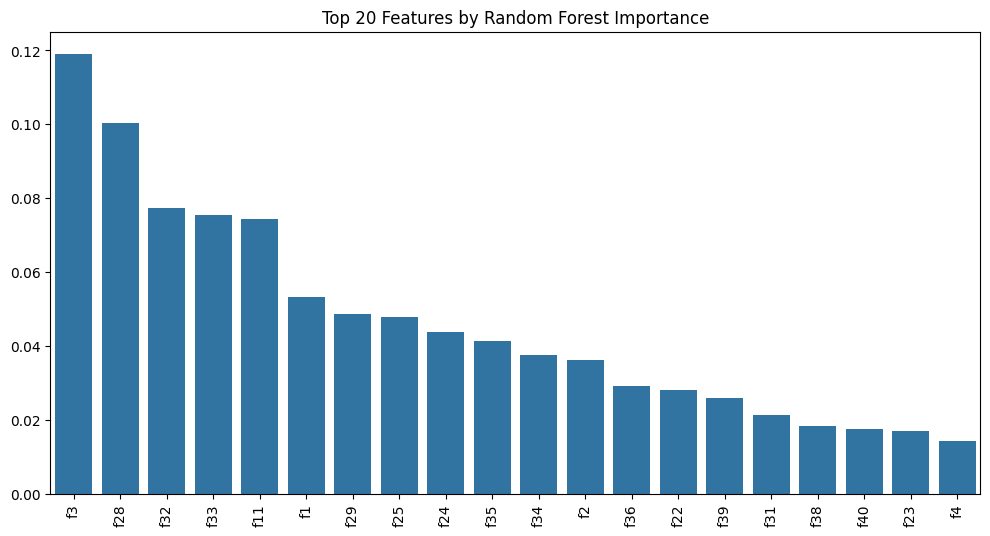

In [3]:
# 🔢 Plot top 20 features
plt.figure(figsize=(12, 6))
sns.barplot(x=[f'f{i}' for i in indices[:20]], y=importances[indices[:20]])
plt.title('Top 20 Features by Random Forest Importance')
plt.xticks(rotation=90)
plt.show()

In [4]:
# 🔍 SHAP TreeExplainer (Compatible)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# SHAP summary plot for class 1 (malicious)
shap.summary_plot(shap_values[1], X_train, feature_names=[f'f{i}' for i in range(X_train.shape[1])])

KeyboardInterrupt: 